<a href="https://colab.research.google.com/github/javier-jaime/Stock_Price_Forecasting/blob/main/Updated_BTC_Price_Forecasting_with_yfinance_and_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Forecasting with yfinance and Facebook Prophet**

## Importing all the necessary Libraries

In [27]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [72]:
# Stock Ticker Input
stock = input('Enter the stock ticker: ')
print(f'You entered {stock}, here is the data from the last 10 days:')
period = '1y'
ticker = yf.Ticker(stock)
data = ticker.history(period)
data.reset_index(inplace=True)
data.tail(10)

Enter the stock ticker: BTC-USD
You entered BTC-USD, here is the data from the last 10 days:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
356,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,41083758949,0,0
357,2021-10-13,56038.257812,57688.660156,54370.972656,57401.097656,41684252783,0,0
358,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,36615791366,0,0
359,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,51780081801,0,0
360,2021-10-16,61609.527344,62274.476562,60206.121094,60892.179688,34250964237,0,0
361,2021-10-17,60887.652344,61645.523438,59164.468750,61553.617188,29032367511,0,0
362,2021-10-18,61548.804688,62614.660156,60012.757812,62026.078125,38055562075,0,0
363,2021-10-19,62043.164062,64434.535156,61622.933594,64261.992188,40471196346,0,0
364,2021-10-20,64284.585938,66930.390625,63610.675781,65992.835938,40788955582,0,0
365,2021-10-21,65919.140625,66561.132812,62551.632812,63129.300781,47843684352,0,0


In [73]:
print('These are the basic stats:')
data.describe()

These are the basic stats:


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.0,366.0
mean,39982.946508,41220.941614,38661.006393,40118.291104,4.791008e+10,0.0,0.0
std,13806.320939,14120.040484,13421.019334,13784.645636,2.456159e+10,0.0,0.0
min,11913.077148,13015.961914,11900.928711,12823.689453,1.878799e+10,0.0,0.0
25%,32397.888672,33475.551758,31185.654785,32401.209473,3.318832e+10,0.0,0.0
50%,40211.455078,42059.455078,38751.816406,40330.408203,4.283789e+10,0.0,0.0
75%,49917.268555,51861.505859,48840.918945,50005.187500,5.851956e+10,0.0,0.0
max,65919.140625,66930.390625,63610.675781,65992.835938,3.509679e+11,0.0,0.0


# Data Visualization (plotly express) - Visualizing the historical performance

In [74]:
#Line graph (Price), Area graph (Volume) , box plot (Analyzing price and volume)

In [75]:
px.line(data, x="Date", y="Close", title=f'{stock} Stock Close Price')

In [76]:
px.bar(data, x="Date", y="Volume", title=f'{stock} Stock Volume')

In [77]:
px.box(data, y="Close", title=f'{stock} box plot', height=500, width=500)

In [78]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [79]:
for lag in [5, 20, 100]:
    hurst_exp = get_hurst_exponent(data["Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 5 lags: 0.5242
Hurst exponent with 20 lags: 0.5429
Hurst exponent with 100 lags: 0.5736


## Data Preparation for Facebook Prophet

In [80]:
columns=['Date','Close']
prophet_df=pd.DataFrame(data,columns=columns)
prophet_df= prophet_df.rename(columns={'Date':'ds','Close':'y'})  
prophet_df.tail()

,ds,y
361,2021-10-17,61553.617188
362,2021-10-18,62026.078125
363,2021-10-19,64261.992188
364,2021-10-20,65992.835938
365,2021-10-21,63129.300781


## Creating Facebook Prophet Model

In [81]:
m=Prophet(yearly_seasonality=True)
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [82]:
periods = 30
future=m.make_future_dataframe(periods)

In [83]:
forecast=m.predict(future)

In [84]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-21,13381.668713,8693.722714,14901.339359,13381.668713,13381.668713,-1585.406496,-1585.406496,-1585.406496,32.608891,32.608891,32.608891,-1618.015387,-1618.015387,-1618.015387,0.0,0.0,0.0,11796.262217
1,2020-10-22,13528.192599,9070.474421,15012.819368,13528.192599,13528.192599,-1320.877986,-1320.877986,-1320.877986,-116.526735,-116.526735,-116.526735,-1204.351251,-1204.351251,-1204.351251,0.0,0.0,0.0,12207.314613
2,2020-10-23,13674.716485,10294.279952,15865.186966,13674.716485,13674.716485,-642.032156,-642.032156,-642.032156,223.107489,223.107489,223.107489,-865.139646,-865.139646,-865.139646,0.0,0.0,0.0,13032.684329
3,2020-10-24,13821.240371,10522.994444,16378.718364,13821.240371,13821.240371,-431.032464,-431.032464,-431.032464,167.866710,167.866710,167.866710,-598.899174,-598.899174,-598.899174,0.0,0.0,0.0,13390.207907
4,2020-10-25,13967.764257,10668.880329,16802.902557,13967.764257,13967.764257,-350.709605,-350.709605,-350.709605,52.068002,52.068002,52.068002,-402.777608,-402.777608,-402.777608,0.0,0.0,0.0,13617.054651
5,2020-10-26,14114.288142,10785.184028,16872.626431,14114.288142,14114.288142,-367.388114,-367.388114,-367.388114,-94.748589,-94.748589,-94.748589,-272.639525,-272.639525,-272.639525,0.0,0.0,0.0,13746.900029
6,2020-10-27,14260.812028,10636.074771,16581.640325,14260.812028,14260.812028,-467.559409,-467.559409,-467.559409,-264.375769,-264.375769,-264.375769,-203.183640,-203.183640,-203.183640,0.0,0.0,0.0,13793.252619
7,2020-10-28,14407.335914,11348.411785,17538.824782,14407.335914,14407.335914,-155.478264,-155.478264,-155.478264,32.608891,32.608891,32.608891,-188.087155,-188.087155,-188.087155,0.0,0.0,0.0,14251.857650
8,2020-10-29,14553.859800,11209.018952,17007.222258,14553.859800,14553.859800,-336.700496,-336.700496,-336.700496,-116.526735,-116.526735,-116.526735,-220.173761,-220.173761,-220.173761,0.0,0.0,0.0,14217.159304
9,2020-10-30,14700.383686,11574.310594,17582.158978,14700.383686,14700.383686,-68.493778,-68.493778,-68.493778,223.107489,223.107489,223.107489,-291.601268,-291.601268,-291.601268,0.0,0.0,0.0,14631.889907


In [85]:
px.line(forecast, x='ds',y='yhat', title=f'{stock} Stock Forecast')

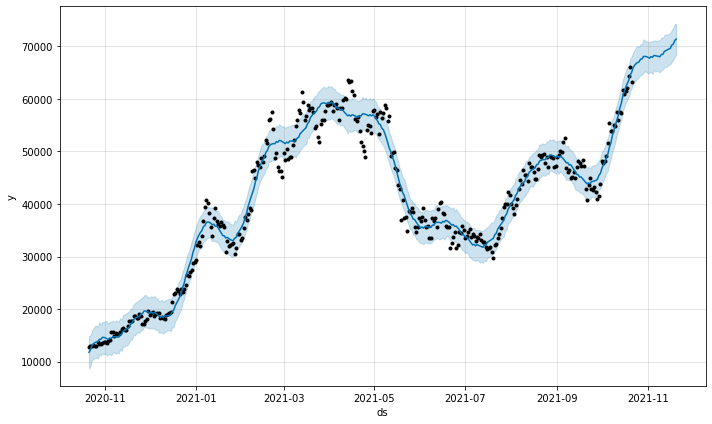

In [86]:
figure=m.plot(forecast, xlabel='ds', ylabel='y')

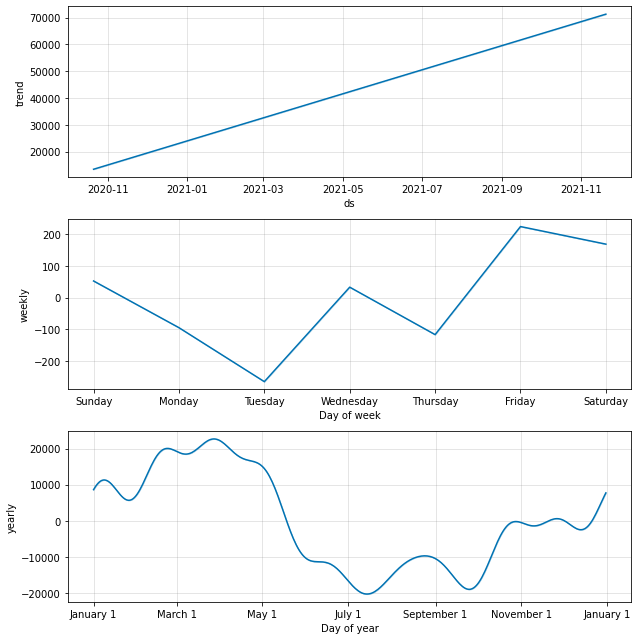

In [87]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [55]:
from google.colab import files
forecast.to_csv(f'{stock}_forecast.csv')
files.download(f'{stock}_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>